<h1> NLP Exercise 01 </h1>

<h3>Submitted By : Rakesh Lagare (374183)</h3>

<h4> Helper Functions </h4>

In [19]:
import nltk
from nltk import word_tokenize, pos_tag


def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'suffix-1': sentence[index][-1],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1]
    }


def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]


def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y




<h4>Corpus - Dataset Preparation </h4>

In [21]:
#nltk.corpus.treebank.tagged_sents()
X1_treebank = nltk.corpus.treebank.tagged_sents()
X2_Brown = nltk.corpus.brown.tagged_sents()
X3_Language = nltk.corpus.indian.tagged_sents('marathi.pos')

X1_size = int(.75 * len(X1_treebank))
X1_train = X1_treebank[:X1_size]
X1_test = X1_treebank[X1_size:]

X2_size = int(.75 * len(X2_Brown))
X2_train = X2_Brown[:X2_size]
X2_test = X2_Brown[X2_size:]

X3_size = int(.8 * len(X3_Language))
X3_train = X3_Language[:X3_size]
X3_test = X3_Language[X3_size:]

X1 = nltk.corpus.treebank
X2 = nltk.corpus.brown
X3 = nltk.corpus.indian


<h4> Perpormance Measurement </h4>

In [73]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline


def  model1_accuracy(dataset,name,model_number):
    print(f"Wait,training .... Model{model_number} in {name}... " )
    size=10000
    
    X_train, y_train = transform_to_dataset(dataset)

    clf = Pipeline([ ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
    ])

    clf.fit(X_train[:size], y_train[:size]) 
    X_test, y_test = transform_to_dataset(dataset)

    accuracy=clf.score(X_test, y_test)
    print ("Done")
    return accuracy


def model2_accuracy(dataset,name):
    print(f"Wait,training .... Model2 in {name}... " )
    sents = dataset.sents()
    X_pred, y_pred = transform_to_dataset(nltk.pos_tag_sents(sents))
    X, y = transform_to_dataset(dataset.tagged_sents())
    total_count = len(y)
    match_count = 0
    for i in range(total_count):
        if y[i] == y_pred[i]:
            match_count += 1
    print ("Done")
    return match_count * 1.0/total_count


from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg



patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'),  (r'.*es$', 'VBZ'), 
            (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'), (r'.*s$', 'NNS'), 
            (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

def model3_x1_accuracy(tagged_sents):
    
    
    
def model3_x2_accuracy(tagged_sents):
    size = int(len(tagged_sents) * 0.8)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    accuracy1_6_1_x2= nltk.DefaultTagger('NN').evaluate(train_sents)
    accuracy1_6_2_x2= nltk.UnigramTagger(train_sents).evaluate(train_sents)
    accuracy1_6_3_x2 = nltk.BigramTagger(train_sents).evaluate(train_sents)
    accuracy1_6_4_x2 = nltk.TrigramTagger(train_sents).evaluate(train_sents)
    accuracy1_6_5_x2 = nltk.RegexpTagger(patterns).evaluate(train_sents)
    
    
    print("\n Default Tagger accuracy :" ,accuracy1_6_1_x2)
    print("\n Unigram Tagger accuracy on :",accuracy1_6_2_x2)
    print("\n Bigram Tagger accuracy on :",accuracy1_6_3_x2)
    print("\n Trigram Tagger accuracy on :",accuracy1_6_4_x2)
    print("\n RegEx Tagger accuracy on :",accuracy1_6_5_x2)   
    
    

<h2>Task 01 </h2>

<h4>Performance 1.1  ---------    Model-1 in X1 </h4>

In [55]:
accuracy1_1_x1 = model1_accuracy(X1_treebank, 'X1',1)
print('Accuracy for Model1 in X1: ', accuracy)

Wait,training .... Model1 in X1... 
Done
Accuracy for Model1 in X1:  0.619474643297577


<h4>Performance 1.2 --------- Model-2 in X1 </h4>

In [60]:
accuracy1_2_x1 = model2_accuracy(X1,'X1')
print("Accuracy Model2 in X1:", accuracy)

Wait,training .... Model2 in X1... 
Done
Accuracy Model2 in X1: 8.169539618527322


<h4>Performance 1.3.X --------- Model-3 in X1 </h4>

In [82]:
print('Accuracy for Model3 in X1: ')

size = int(len(X1_treebank) * 0.8)
train_sents = X1_treebank[:size]
test_sents = X1_treebank[size:]
    
accuracy1_3_1_x1= nltk.DefaultTagger('NN').evaluate(train_sents)
accuracy1_3_2_x1= nltk.UnigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_3_x1 = nltk.BigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_4_x1 = nltk.TrigramTagger(train_sents).evaluate(train_sents)
accuracy1_3_5_x1 = nltk.RegexpTagger(patterns).evaluate(train_sents)
    
    
print("\n Default Tagger accuracy :" ,accuracy1_3_1_x1)
print("\n Unigram Tagger accuracy on :",accuracy1_3_2_x1)
print("\n Bigram Tagger accuracy on :",accuracy1_3_3_x1)
print("\n Trigram Tagger accuracy on :",accuracy1_3_4_x1)
print("\n RegEx Tagger accuracy on :",accuracy1_3_5_x1)

Accuracy for Model3 in X1: 

 Default Tagger accuracy : 0.12729888264692388

 Unigram Tagger accuracy on : 0.9597455262472562

 Bigram Tagger accuracy on : 0.9118146756451753

 Trigram Tagger accuracy on : 0.9085531455783326

 RegEx Tagger accuracy on : 0.2138472413408237


<h4>Performance 1.4 --------- Model-1 in X2 </h4>

In [58]:
pieces  =  10
accuracy = 0
l1 = 0
for i in range(1,pieces+1):
    l2 = int(len(X2_Brown) * i * 1.0/pieces)
    accuracy += model1_accuracy(X2_Brown[l1:l2], "X2("+str(l1)+":"+str(l2)+")",1)
    l1 = l2

accuracy1_4_x2 = 1.0 * accuracy/pieces
print('Accuracy for Model1 in X2: ', accuracy)

Wait,training .... Model1 in X2(0:5734)... 
Done
Wait,training .... Model1 in X2(5734:11468)... 
Done
Wait,training .... Model1 in X2(11468:17202)... 
Done
Wait,training .... Model1 in X2(17202:22936)... 
Done
Wait,training .... Model1 in X2(22936:28670)... 
Done
Wait,training .... Model1 in X2(28670:34404)... 
Done
Wait,training .... Model1 in X2(34404:40138)... 
Done
Wait,training .... Model1 in X2(40138:45872)... 
Done
Wait,training .... Model1 in X2(45872:51606)... 
Done
Wait,training .... Model1 in X2(51606:57340)... 
Done
Accuracy for Model1 in X2:  8.169539618527322


<h4>Performance 1.5 --------- Model-2 in X2 </h4>

In [57]:
accuracy1_5_x2 = model2_accuracy(X2,'X2')
print("Accuracy Model2 in X2:", accuracy)


Wait,training .... Model2 in X2... 
Done
Accuracy Model2 in X2: 0.619474643297577


<h4>Performance 1.6.X --------- Model-3 in X2 </h4>

In [83]:
print('Accuracy for Model3 in X2: ')

size = int(len(X2_Brown) * 0.8)
train_sents = X2_Brown[:size]
test_sents = X2_Brown[size:]
    
accuracy1_6_1_x2= nltk.DefaultTagger('NN').evaluate(train_sents)
accuracy1_6_2_x2= nltk.UnigramTagger(train_sents).evaluate(train_sents)
accuracy1_6_3_x2 = nltk.BigramTagger(train_sents).evaluate(train_sents)
accuracy1_6_4_x2 = nltk.TrigramTagger(train_sents).evaluate(train_sents)
accuracy1_6_5_x2 = nltk.RegexpTagger(patterns).evaluate(train_sents)
    
    
print("\n Default Tagger accuracy :" ,accuracy1_6_1_x2)
print("\n Unigram Tagger accuracy on :",accuracy1_6_2_x2)
print("\n Bigram Tagger accuracy on :",accuracy1_6_3_x2)
print("\n Trigram Tagger accuracy on :",accuracy1_6_4_x2)
print("\n RegEx Tagger accuracy on :",accuracy1_6_5_x2)

Accuracy for Model3 in X2: 

 Default Tagger accuracy : 0.13525702141385765

 Unigram Tagger accuracy on : 0.9252791314413574

 Bigram Tagger accuracy on : 0.7951443684759597

 Trigram Tagger accuracy on : 0.7561670235983202

 RegEx Tagger accuracy on : 0.1989790189517438


<h2>Charts </h2>

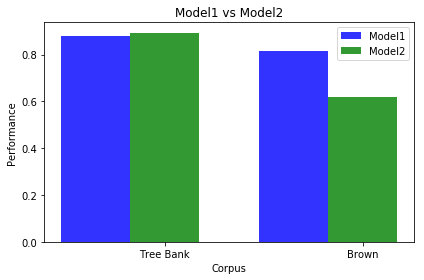

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

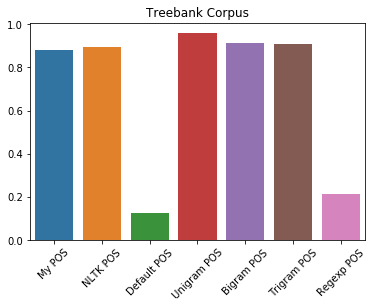

In [91]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import seaborn as sea1
 
# data to plot
n_groups = 2
model1 = (accuracy1_1_x1, accuracy1_4_x2)
model2 = (accuracy1_2_x1, accuracy1_5_x2)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, model1, bar_width,alpha=opacity, color='b',label='Model1')
 
rects2 = plt.bar(index + bar_width, model2, bar_width,alpha=opacity,color='g',label='Model2')
 
plt.xlabel('Corpus')
plt.ylabel('Performance')
plt.title('Model1 vs Model2')
plt.xticks(index + bar_width, ('Tree Bank', 'Brown'))
plt.legend()
 
plt.tight_layout()
plt.show()


x = ['My POS','NLTK POS','Default POS', 'Unigram POS', 'Bigram POS', 'Trigram POS', 'Regexp POS']
y = [accuracy1_1_x1, accuracy1_2_x1, accuracy1_3_1_x1, accuracy1_3_2_x1, accuracy1_3_3_x1, accuracy1_3_4_x1, accuracy1_3_5_x1]
sea.barplot(x, y)
plt.title('Treebank Corpus')
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

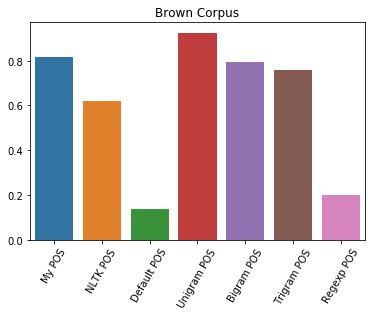

In [90]:

x1 = ['My POS','NLTK POS','Default POS', 'Unigram POS', 'Bigram POS', 'Trigram POS', 'Regexp POS']
y1 = [accuracy1_4_x2, accuracy1_5_x2, accuracy1_6_1_x2, accuracy1_6_2_x2, accuracy1_6_3_x2, accuracy1_6_4_x2, accuracy1_6_5_x2]
sea1.barplot(x1, y1)
plt.title('Brown Corpus')
plt.xticks(rotation=60)

<h2> </h2>

<h2>Task 02 </h2>

<h4> Language Selected : Marathi </h4>

In [108]:
marathi_numbers = [chr(0x0966), chr(0x0967), chr(0x0968), chr(0x0969), chr(0x096A),
                   chr(0x096B), chr(0x096C), chr(0x096D), chr(0x096E), chr(0x096F)]

def isNumberMarathi(word):
    isNum = True
    for i in list(word):
        if i not in marathi_numbers:
            isNum = False
            break;
    
    return isNum

    
def marathi_features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0] if sentence[index] != '' else '',
        'prefix-2': sentence[index][:2] if sentence[index] != '' else '',
        'prefix-3': sentence[index][:3] if sentence[index] != '' else '',
        'suffix-1': sentence[index][-1] if sentence[index] != '' else '',
        'suffix-2': sentence[index][-2:] if sentence[index] != '' else '',
        'suffix-3': sentence[index][-3:] if sentence[index] != '' else '',
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit() or isNumberMarathi(sentence[index])
    }


def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]


cutoff = int(.75 * len(X3_Language))
training_sentences = X3_Language[:cutoff]
test_sentences = X3_Language[cutoff:]
 
    
    
def transform_to_dataset_marathi(tagged_sentences):
    X,y = [],[]
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(marathi_features(untag(tagged), index))
            y.append(tagged[index][1])

    return X,y
    
 
 
X, y = transform_to_dataset_marathi(training_sentences)


def model4_accuracy(tagged_sents, piece):
    size = int(len(tagged_sents) * 0.8)
    train_sents = tagged_sents[:size]
    test_sents = tagged_sents[size:]
    
    X_train,y_train = transform_to_dataset_marathi(train_sents)
    
    print("Training ", piece, "...")
    clf = Pipeline([
        ('vectorizer', DictVectorizer(sparse=False)),
        ('classifier', DecisionTreeClassifier(criterion='entropy'))
    ])
    clf.fit(X_train[:10000], y_train[:10000])
    print("Training over")
    
    X_test, y_test = transform_to_dataset_marathi(test_sents)
    accuracy = clf.score(X_test, y_test)
    
    return accuracy


In [101]:
marathi_features(['महाराष्ट्र', 'अध्यक्ष','6','(', 'यशवंत', 'होते'], 1)

{'has_hyphen': False,
 'is_first': False,
 'is_last': False,
 'is_numeric': False,
 'next_word': '6',
 'prefix-1': 'अ',
 'prefix-2': 'अध',
 'prefix-3': 'अध्',
 'prev_word': 'महाराष्ट्र',
 'suffix-1': 'ष',
 'suffix-2': '्ष',
 'suffix-3': 'क्ष',
 'word': 'अध्यक्ष'}

<h4>Performance 2.1 --------- Model-4 in X3 </h4> 

In [109]:
accuracy = model4_accuracy(X3_Language, 'X3')
print('Accuracy for Model4 in X3: ', accuracy)


Training  X3 ...
Training over
Accuracy for Model4 in X3:  0.747287642233395


<h3> Model 5</h3>

<h4> 
POS tagger model: RDRPOSTagger </h4>
<h4>After trying n number of times couldnot find the work around to import RDRPOSTagger </h4>

In [ ]:
import sys
sys.path.insert(0, r'C:\Megatron\Jupyter\RDRPOSTagger-python-3-master\pSCRDRtagger')
import RDRPOSTagger as rpt